### import pandas as pd

In [1]:
import pandas as pd

# Read in the data files into pandas tables

In [2]:
import os

path = os.getcwd()
print(path)

/Users/jrmotta/Documents/Data Science


In [3]:
# Data is from https://grouplens.org/datasets/movielens/
# Use "MovieLens 1M Dataset"
unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] 
users = pd.read_table('./ml-1m/users.dat', sep='::', header=None, 
                      names=unames, engine='python')

In [4]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./ml-1m/movies.dat', sep='::', header=None, encoding='latin1',
                        names=mnames, engine='python')

In [5]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('./ml-1m/ratings.dat', sep='::', header=None, 
                        names=rnames, engine='python')

In [6]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.size

4000836

# Creating a merged database

In [10]:
movies_ratings = pd.merge(movies, ratings)
movies_ratings[:5]

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [11]:
data = pd.merge(movies_ratings, users)
data[:5]

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


# Start to explore the merged database

In [12]:
# Get average ratings of all movies and separate by gender
mean_ratings = data.pivot_table('rating', index=['title'],
                    columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [13]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [14]:
mean_ratings2 = data.pivot_table('rating', index=['title', 'genres'],
                    columns='gender', aggfunc='mean')
mean_ratings2[:5]

,gender,F,M
title,genres,,
"$1,000,000 Duck (1971)",Children's|Comedy,3.375000,2.761905
'Night Mother (1986),Drama,3.388889,3.352941
'Til There Was You (1997),Drama|Romance,2.675676,2.733333
"'burbs, The (1989)",Comedy,2.793478,2.962085
...And Justice for All (1979),Drama|Thriller,3.828571,3.689024


In [15]:
num_ratings = data.groupby('title').size()
num_ratings[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [16]:
# meaningful ratings are when we have at least 250 people rate a movie
meaningful_ratings = num_ratings.index[num_ratings >= 250]
meaningful_ratings

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [17]:
meaningful_mean_ratings = mean_ratings.loc[meaningful_ratings]

In [18]:
meaningful_mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [19]:
top_female_ratings = meaningful_mean_ratings.sort_values(by='F', ascending=False)

In [20]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [21]:
top_male_ratings = meaningful_mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [22]:
meaningful_mean_ratings['diff'] = meaningful_mean_ratings['M'] - meaningful_mean_ratings['F']
sorted_by_diff = meaningful_mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [23]:
sorted_by_diff[-10:]

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


In [24]:
rating_std = data.groupby('title')['rating'].std()
rating_std = rating_std.loc[meaningful_ratings] # filter only meaningful ones
rating_std.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [25]:
rating_std.sort_values()[:10]

title
Close Shave, A (1995)                            0.667143
Rear Window (1954)                               0.688946
Great Escape, The (1963)                         0.692585
Shawshank Redemption, The (1994)                 0.700443
Wrong Trousers, The (1993)                       0.708666
Raiders of the Lost Ark (1981)                   0.725647
North by Northwest (1959)                        0.732515
Hustler, The (1961)                              0.737298
Double Indemnity (1944)                          0.740793
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    0.740924
Name: rating, dtype: float64

# Homework 2

In [26]:
group_genres = data.groupby('genres', observed=False).size().sort_values(ascending=False)
top20_genres=group_genres[:20].index


### Q1
a)

In [27]:
top20_genres

Index(['Comedy', 'Drama', 'Comedy|Romance', 'Comedy|Drama', 'Drama|Romance',
       'Action|Thriller', 'Horror', 'Drama|Thriller', 'Thriller',
       'Action|Adventure|Sci-Fi', 'Drama|War', 'Action|Sci-Fi',
       'Action|Sci-Fi|Thriller', 'Action', 'Action|Drama|War', 'Crime|Drama',
       'Comedy|Drama|Romance', 'Action|Adventure', 'Action|Drama',
       'Comedy|Horror'],
      dtype='object', name='genres')

In [28]:
mean_ratings3 = data.pivot_table('rating', index='genres', aggfunc='mean')
mean_ratings3

,rating
genres,
Action,3.354886
Action|Adventure,3.676814
Action|Adventure|Animation,4.147826
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Animation|Horror|Sci-Fi,3.546926
...,...
Sci-Fi|Thriller|War,3.439286
Sci-Fi|War,4.449890
Thriller,3.555879


b)

In [29]:
top20_mean_ratings= mean_ratings3.loc[top20_genres]
top20_mean_ratings

,rating
genres,
Comedy,3.464456
Drama,3.780611
Comedy|Romance,3.530905
Comedy|Drama,3.720559
Drama|Romance,3.605417
Action|Thriller,3.525917
Horror,3.071932
Drama|Thriller,3.782552
Thriller,3.555879


c)

In [30]:
v= data.loc[data["genres"] == 'Drama']
v

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
22,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,5,978300760,F,1,10,48067
24,1207,To Kill a Mockingbird (1962),Drama,1,4,978300719,F,1,10,48067
25,1246,Dead Poets Society (1989),Drama,1,4,978302091,F,1,10,48067
28,1545,Ponette (1996),Drama,1,4,978824139,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000132,2336,Elizabeth (1998),Drama,768,5,975452845,M,25,12,17067
1000142,2702,Summer of Sam (1999),Drama,768,5,975451058,M,25,12,17067
1000148,2959,Fight Club (1999),Drama,768,5,975449393,M,25,12,17067
1000173,2712,Eyes Wide Shut (1999),Drama,5727,1,958491014,M,25,4,92843


In [31]:
mean_ratings4 = v.pivot_table('rating', index='title',columns='gender', aggfunc='mean').sort_values(by='F',ascending=False)
mean_ratings4


gender,F,M
title,,
I Am Cuba (Soy Cuba/Ya Kuba) (1964),5.0,4.750000
Song of Freedom (1936),5.0,NaN
"Woman of Paris, A (1923)",5.0,2.428571
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
"Gambler, The (A Játékos) (1997)",5.0,3.166667
...,...,...
"War at Home, The (1996)",NaN,2.500000
Wend Kuuni (God's Gift) (1982),NaN,4.000000
White Boys (1999),NaN,1.000000


### Q2

In [32]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import matplotlib as mpl
import matplotlib.pyplot as plt

# Let's read in the data file
rawd = pd.read_excel('DADE_SchoolGrades17.xls', header = None)
rawd = rawd[4:]
rawd.columns = rawd.iloc[0]
rawd = rawd[1:]

In [33]:
df2 = pd.DataFrame(rawd, columns = ['District Number', 'District Name', 'School Number', 'School Name',
       'English Language Arts Achievement',
       'English Language Arts Learning Gains',
       'English Language Arts Learning Gains of the Lowest 25%',
       'Mathematics Achievement', 'Mathematics Learning Gains',
       'Mathematics Learning Gains of the Lowest 25%', 'Science Achievement',
       'Social Studies Achievement', 'Middle School Acceleration',
       'Graduation Rate 2015-16', 'College and Career Acceleration 2015-16',
       'Total Points Earned', 'Total Components',
       'Percent of Total Possible Points', 'Percent Tested', 'Grade 2017',
       'Grade 2016', 'Informational Baseline Grade 2015', 'Grade 2014',
       'Grade 2013', 'Grade 2012', 'Grade 2011', 'Grade 2010', 'Grade 2009',
       'Grade 2008', 'Grade 2007', 'Grade 2006', 'Grade 2005', 'Grade 2004',
       'Grade 2003', 'Grade 2002', 'Grade 2001', 'Grade 2000', 'Grade 1999',
       'Was the collocated rule used?', 'Collocated Number', 'Charter School',
       'Title I', 'Alternative/ESE Center School', 'School Type',
       'Percent of Minority Students',
       'Percent of Economically Disadvantaged Students', 'Region'])
df2.head()

,District Number,District Name,School Number,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,...,Grade 1999,Was the collocated rule used?,Collocated Number,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,Region
5,13,DADE,0041,AIR BASE K-8 CENTER FOR INTERNATIONAL EDUCATION,86,68,66,87,70,69,...,C,N,NaN,NO,NO,N,04,89.5,62.3,3
6,13,DADE,0070,CORAL REEF MONTESSORI ACADEMY CHARTER,75,61,57,63,67,58,...,NaN,N,NaN,YES,NO,N,04,79.9,19.2,3
7,13,DADE,0071,EUGENIA B. THOMAS K-8 CENTER,67,63,60,65,60,44,...,NaN,N,NaN,NO,NO,N,04,95.4,44.8,3
8,13,DADE,0072,SUMMERVILLE ADVANTAGE ACADEMY,51,56,48,60,66,55,...,NaN,N,NaN,YES,YES,N,01,94.4,79.0,3
9,13,DADE,0073,MANDARIN LAKES K-8 ACADEMY,32,49,44,37,48,38,...,NaN,N,NaN,NO,YES,N,04,96.7,97.3,3


In [34]:
# for examples of describe(), see 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df2.groupby('School Type').size().sort_values(ascending=False)

School Type
01    204
04     84
03     77
02     75
dtype: int64

In [35]:
df = df2[['English Language Arts Achievement', 'Social Studies Achievement', 
          'Mathematics Achievement', 'Science Achievement']].copy()
df = df.dropna(axis=0)
df.describe()
len(df)

224

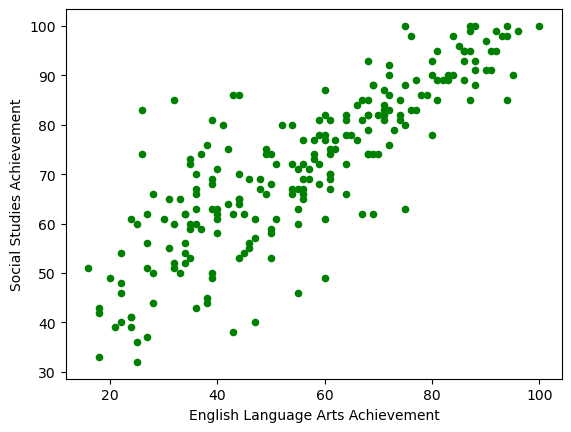

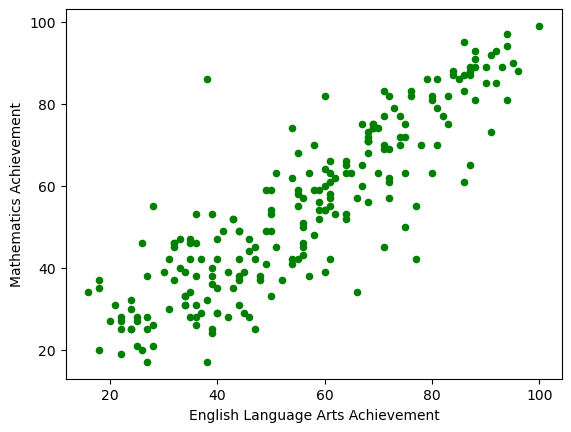

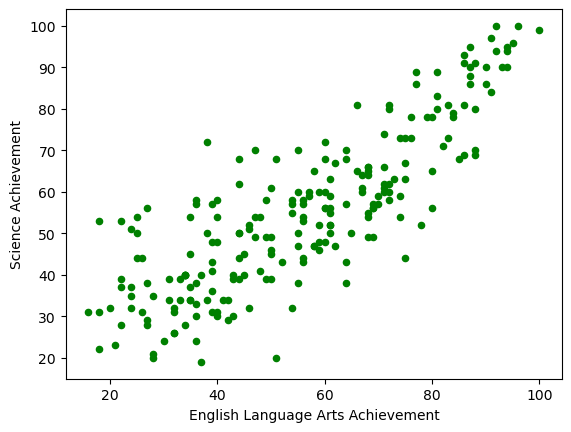

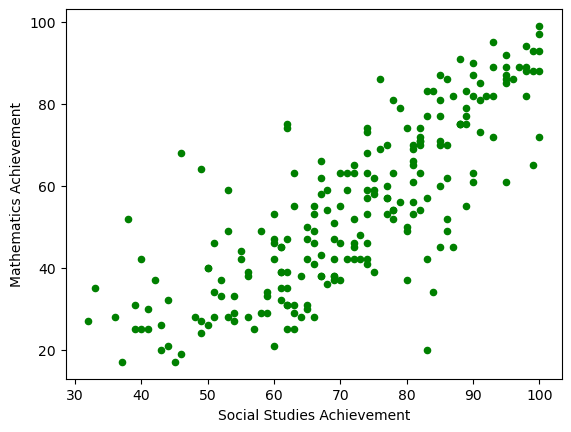

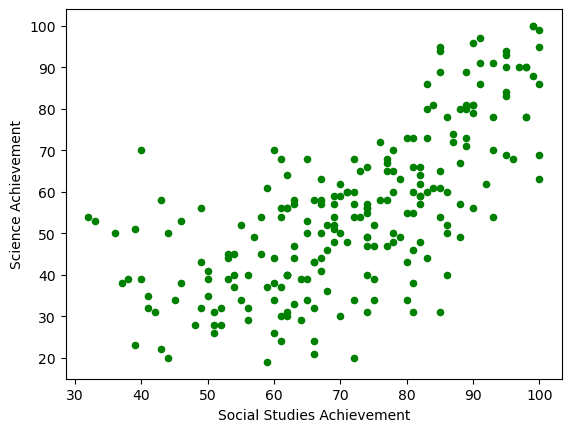

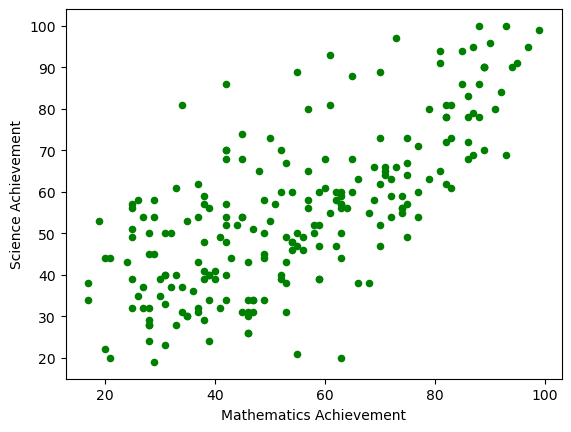

In [36]:
df.plot.scatter(x='English Language Arts Achievement', y='Social Studies Achievement', c='green')
df.plot.scatter(x='English Language Arts Achievement', y='Mathematics Achievement', c='green')
df.plot.scatter(x='English Language Arts Achievement', y='Science Achievement', c='green')
df.plot.scatter(x='Social Studies Achievement', y='Mathematics Achievement', c='green')
df.plot.scatter(x='Social Studies Achievement', y='Science Achievement', c='green')
df.plot.scatter(x='Mathematics Achievement', y='Science Achievement', c='green')

plt.show()

In [37]:
df

,English Language Arts Achievement,Social Studies Achievement,Mathematics Achievement,Science Achievement
5,86,95,87,69
6,75,63,63,44
7,67,81,65,60
9,32,52,37,32
11,68,82,71,64
...,...,...,...,...
440,49,66,49,58
441,54,67,62,58
442,54,72,42,57
443,25,60,21,44


[[34.71590909 57.26136364 35.11363636 39.38636364]
 [61.57303371 74.95505618 59.         56.48314607]
 [84.40425532 92.14893617 82.72340426 82.12765957]]
[[34.71590909 57.26136364 35.11363636 39.38636364]
 [61.57303371 74.95505618 59.         56.48314607]
 [84.40425532 92.14893617 82.72340426 82.12765957]]


/Users/jrmotta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


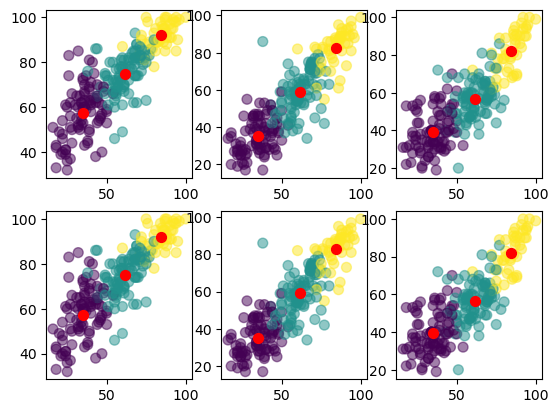

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=87).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.subplot(2, 3, 1)
plt.scatter(df['English Language Arts Achievement'], df['Social Studies Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', s=50)


plt.subplot(2, 3, 2)
plt.scatter(df['English Language Arts Achievement'], df['Mathematics Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 2], c='red', s=50)


plt.subplot(2, 3, 3)
plt.scatter(df['English Language Arts Achievement'], df['Science Achievement'], 
            c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 3], c='red', s=50)

## With init=8 and elkan algorithm

kmeans2 = KMeans(n_clusters = 3, n_init = 8, random_state = 87).fit(df)
centroids2 = kmeans2.cluster_centers_
print(centroids2)

plt.subplot(2, 3, 4)
plt.scatter(df['English Language Arts Achievement'], df['Social Studies Achievement'], 
            c=kmeans2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:,0], centroids2[:, 1], c='red', s=50)


plt.subplot(2, 3, 5)
plt.scatter(df['English Language Arts Achievement'], df['Mathematics Achievement'], 
            c=kmeans2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:,0], centroids2[:, 2], c='red', s=50)


plt.subplot(2, 3, 6)
plt.scatter(df['English Language Arts Achievement'], df['Science Achievement'], 
            c=kmeans2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:,0], centroids2[:, 3], c='red', s=50)




### Q3

In [58]:
%%timeit
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 3,n_init= 10, random_state=87).fit(df)
centroids = kmeans.cluster_centers_


11.2 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 87, algorithm = 'lloyd')
y_means = kmeans.fit_predict(df)

silhuette_ave = silhouette_score(df, y_means)
print("Average Silhouette score: ", silhuette_ave)

Average Silhouette score:  0.4062543255096628


In [59]:
%%timeit
## With init=8 and elkan algorithm

kmeans2 = KMeans(n_clusters = 3, n_init = 8, random_state = 87, algorithm = 'elkan').fit(df)
centroids2 = kmeans2.cluster_centers_




4.69 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
from sklearn.metrics import silhouette_score

kmeans2 = KMeans(n_clusters = 3, n_init = 8, random_state = 87, algorithm = 'elkan')
y_means = kmeans2.fit_predict(df)

silhuette_ave = silhouette_score(df, y_means)
print("Average Silhouette score: ", silhuette_ave)

Average Silhouette score:  0.4062543255096628


### Q4

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
np.random.seed(5)

In [42]:
#Permutation Test snippet by Tiago Toledo Jr in https://towardsdatascience.com/pca-102-should-you-use-pca-how-many-components-to-use-how-to-interpret-them-da0c8e3b11f0

import plotly.graph_objects as go
#Process to know number of components needed
# Save initial variance ratio

pca = PCA()
pca.fit(df)
original_variance = pca.explained_variance_ratio_

# Number of tests

N_permutations = 1000
variance = np.zeros((N_permutations, len(df.columns)))

# Generate datasets
for i in range(N_permutations):
    x_aux = df.copy()
    for col in df.columns:
        x_aux[col] = df[col].sample(len(df)).values

    pca.fit(x_aux)
    variance[i, :] = pca.explained_variance_ratio_

# Calculate p value

p_val = np.sum(variance > original_variance, axis=0) / N_permutations

# Display

fig = go.Figure()

fig.add_trace(go.Scatter(x=[f'PC{i}' for i in range(len(df.columns))], y=p_val, name='p-value on significance'))
fig.update_layout(title="PCA Permutation Test p-values")

In [43]:
N = 2
pca = PCA(n_components=N)
pca.fit(df)

PCA(n_components=2)

In [44]:
pca.components_

array([[ 0.56772133,  0.40407362,  0.53996584,  0.47207403],
       [-0.02053625,  0.27301675,  0.5229743 , -0.80717904]])

In [45]:
pca.feature_names_in_

array(['English Language Arts Achievement', 'Social Studies Achievement',
       'Mathematics Achievement', 'Science Achievement'], dtype=object)

In [46]:
from pandas import DataFrame
columns = ['pca_%i' % i for i in range(N)]
df_pca = DataFrame(pca.transform(df), columns=columns, index=df.index)
df_pca.head()

,pca_0,pca_1
5,50.626478,11.531529
6,6.690157,10.648985
7,18.054827,3.858660
9,-41.870671,4.617676
11,24.154713,4.020270


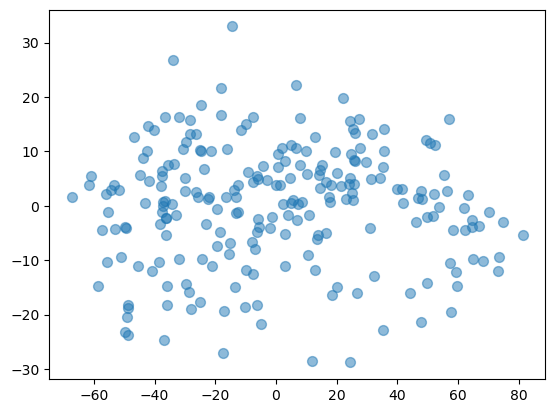

In [47]:
plt.scatter(df_pca['pca_0'], df_pca['pca_1'], s=50, alpha=0.5)
plt.show()

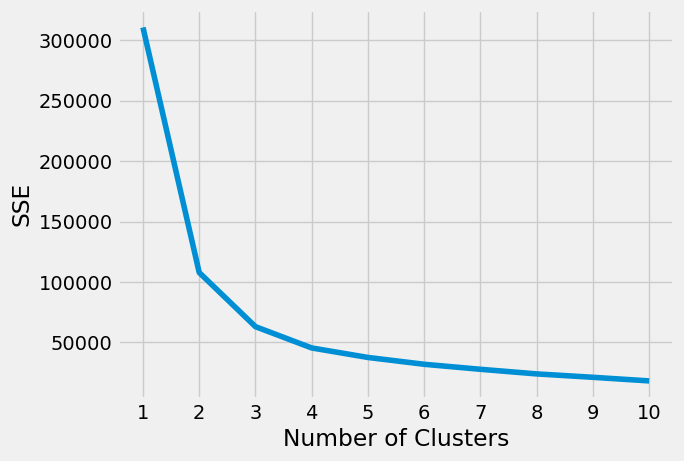

In [48]:
kmeans_kwargs = {
    "init" : "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 87,
}

sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(df_pca)
     sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Parameters Chosen:
    Components for PCA = 2 as permutation test showed only the first two components are relevant
    Clusters = 3 as elbow method showed either 3 or 4 should be good enough clusters
    Algorithm = 'LLoyd' as suggested in sklearn Elkan algorithm is efficient only with datasets with well-defined clusters and as seen on the first graph of PCA it looks like a cloud with not easy   to locate clusters

[[  7.63121004   2.0206237 ]
 [ 52.45651166  -2.04700974]
 [-35.73447433  -0.95029604]]


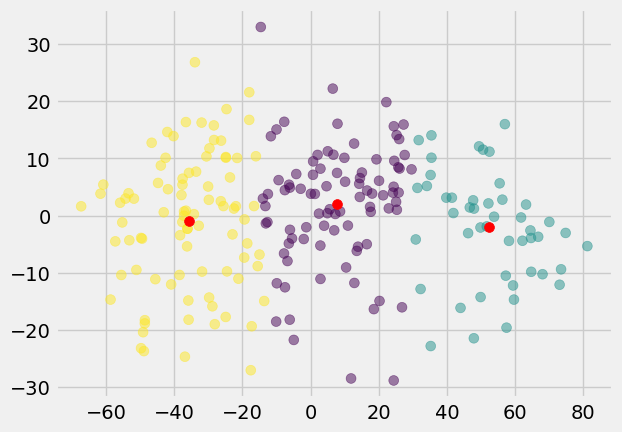

In [49]:
kmeans3 = KMeans(n_clusters = 3, n_init = 10, random_state = 87, algorithm = 'lloyd').fit(df_pca)
centroids3 = kmeans3.cluster_centers_
print(centroids3)

plt.scatter(df_pca['pca_0'], df_pca['pca_1'], 
            c=kmeans3.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids3[:,0], centroids3[:, 1], c='red', s=50)

### Q5

In [68]:
df2

,District Number,District Name,School Number,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,...,Grade 1999,Was the collocated rule used?,Collocated Number,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,Region
5,13,DADE,0041,AIR BASE K-8 CENTER FOR INTERNATIONAL EDUCATION,86,68,66,87,70,69,...,C,N,NaN,NO,NO,N,04,89.5,62.3,3
6,13,DADE,0070,CORAL REEF MONTESSORI ACADEMY CHARTER,75,61,57,63,67,58,...,NaN,N,NaN,YES,NO,N,04,79.9,19.2,3
7,13,DADE,0071,EUGENIA B. THOMAS K-8 CENTER,67,63,60,65,60,44,...,NaN,N,NaN,NO,NO,N,04,95.4,44.8,3
8,13,DADE,0072,SUMMERVILLE ADVANTAGE ACADEMY,51,56,48,60,66,55,...,NaN,N,NaN,YES,YES,N,01,94.4,79.0,3
9,13,DADE,0073,MANDARIN LAKES K-8 ACADEMY,32,49,44,37,48,38,...,NaN,N,NaN,NO,YES,N,04,96.7,97.3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,13,DADE,7741,SOUTHWEST MIAMI SENIOR HIGH,49,45,42,49,50,40,...,C,N,NaN,NO,YES,N,03,95.7,80.5,3
441,13,DADE,7751,BARBARA GOLEMAN SENIOR HIGH,54,48,41,62,63,55,...,D,N,NaN,NO,NO,N,03,94.9,70.1,3
442,13,DADE,7781,FELIX VARELA SENIOR HIGH SCHOOL,54,50,42,42,38,34,...,NaN,N,NaN,NO,NO,N,03,92.2,72.8,3
443,13,DADE,7791,BOOKER T. WASHINGTON SENIOR HIGH,25,44,33,21,40,52,...,NaN,N,NaN,NO,YES,N,03,98.7,91.4,3


In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from pandas import DataFrame
import plotly.graph_objects as go
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
np.random.seed(5)

dfWithType = df2[['English Language Arts Achievement', 'Social Studies Achievement', 
          'Mathematics Achievement', 'Science Achievement', 'School Type','Percent of Economically Disadvantaged Students']].copy()
dfWithType = dfWithType.dropna(axis=0)

#Permutation Test snippet by Tiago Toledo Jr in https://towardsdatascience.com/pca-102-should-you-use-pca-how-many-components-to-use-how-to-interpret-them-da0c8e3b11f0

#Process to know number of components needed
# Save initial variance ratio

pca = PCA()
pca.fit(dfWithType)
original_variance = pca.explained_variance_ratio_

# Number of tests

N_permutations = 1000
variance = np.zeros((N_permutations, len(dfWithType.columns)))

# Generate datasets
for i in range(N_permutations):
    x_aux = dfWithType.copy()
    for col in dfWithType.columns:
        x_aux[col] = dfWithType[col].sample(len(dfWithType)).values

    pca.fit(x_aux)
    variance[i, :] = pca.explained_variance_ratio_

# Calculate p value

p_val = np.sum(variance > original_variance, axis=0) / N_permutations

# Display

fig = go.Figure()

fig.add_trace(go.Scatter(x=[f'PC{i}' for i in range(len(dfWithType.columns))], y=p_val, name='p-value on significance'))
fig.update_layout(title="PCA Permutation Test p-values")

In [95]:
dfWithType['Percent of Economically Disadvantaged Students'] = pd.to_numeric(dfWithType['Percent of Economically Disadvantaged Students'])
dfWithType['Percent of Economically Disadvantaged Students']

5      62.3
6      19.2
7      44.8
9      97.3
11     59.0
       ... 
440    80.5
441    70.1
442    72.8
443    91.4
444    39.3
Name: Percent of Economically Disadvantaged Students, Length: 224, dtype: float64

In [96]:
data_school_type = []
for each in dfWithType['School Type']:
    data_school_type.append(each)

len(data_school_type)

224

In [97]:
data_econ = []
for each in dfWithType['Percent of Economically Disadvantaged Students']:
    if each < 20:
        data_econ.append('0%-20%')
    if each >=20 and each <40:
        data_econ.append('20%-40%')
    if each >=40 and each < 60:
        data_econ.append('40%-60%')
    if each >=60 and each < 80:
        data_econ.append('60%-80%')
    if each >=80 and each <100:
        data_econ.append('80%-100%')
data_econ

['60%-80%',
 '0%-20%',
 '40%-60%',
 '80%-100%',
 '40%-60%',
 '40%-60%',
 '40%-60%',
 '40%-60%',
 '40%-60%',
 '60%-80%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '0%-20%',
 '40%-60%',
 '60%-80%',
 '80%-100%',
 '40%-60%',
 '60%-80%',
 '80%-100%',
 '40%-60%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '0%-20%',
 '80%-100%',
 '60%-80%',
 '0%-20%',
 '20%-40%',
 '80%-100%',
 '80%-100%',
 '40%-60%',
 '80%-100%',
 '80%-100%',
 '0%-20%',
 '60%-80%',
 '20%-40%',
 '40%-60%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '60%-80%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '60%-80%',
 '80%-100%',
 '60%-80%',
 '80%-100%',
 '80%-100%',
 '40%-60%',
 '60%-80%',
 '80%-100%',
 '80%-100%',
 '60%-80%',
 '20%-40%',
 '40%-60%',
 '60%-80%',
 '60%-80%',
 '40%-60%',
 '80%-100%',
 '40%-60%',
 '80%-100%',
 '60%-80%',
 '40%-60%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '60%-80%',
 '40%-60%',
 '60%-80%',
 '40%-60%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '80%-100%',
 '80%-1

In [98]:
#Vectorize labels with colors

color_dict = {'01':'red', '02':'green', 
          '03':'blue', '04':'purple'}
cvec = [color_dict[label] for label in data_school_type]


In [99]:
color_dict2 = {'0%-20%':'red','20%-40%':'green','40%-60%':'blue','60%-80%':'purple','80%-100%':'yellow'}
cvec2 = [color_dict2[label] for label in data_econ]

In [100]:
N = 2
pca = PCA(n_components=N)
pca.fit(dfWithType)

columns = ['pca_%i' % i for i in range(N)]
df_pca = DataFrame(pca.transform(dfWithType), columns=columns, index=dfWithType.index)
df_pca.min()

pca_0   -70.186271
pca_1   -31.761009
dtype: float64

In [101]:
pca.feature_names_in_

array(['English Language Arts Achievement', 'Social Studies Achievement',
       'Mathematics Achievement', 'Science Achievement', 'School Type',
       'Percent of Economically Disadvantaged Students'], dtype=object)

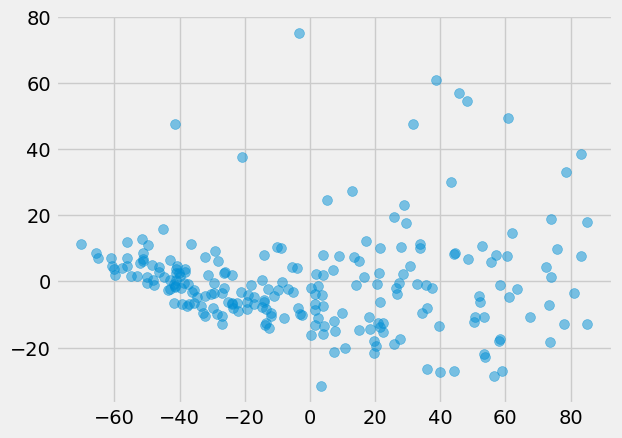

In [102]:
plt.scatter(df_pca['pca_0'], df_pca['pca_1'], s=50, alpha=0.5)
plt.show()

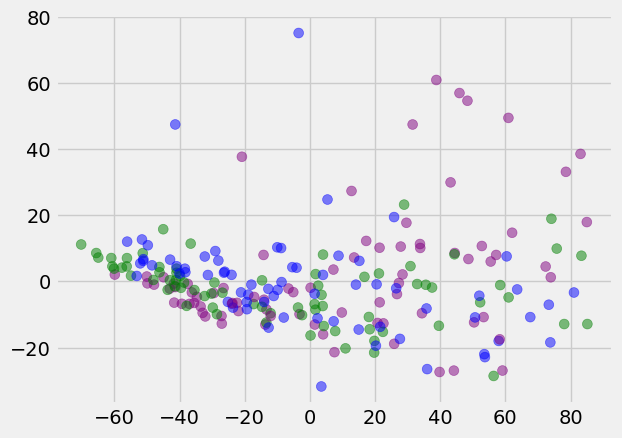

In [104]:
#School Type
plt.scatter(df_pca['pca_0'], df_pca['pca_1'],
            c=cvec, s=50,alpha=0.5)

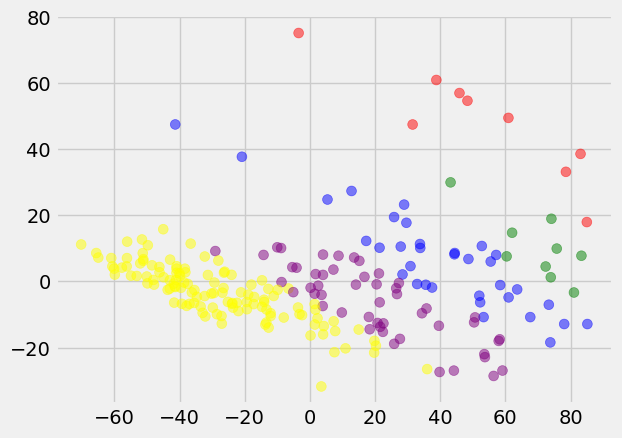

In [105]:
#Economically Disadvataged
plt.scatter(df_pca['pca_0'], df_pca['pca_1'],
            c=cvec2, s=50,alpha=0.5)

In [66]:
df_pca

,pca_0,pca_1
5,50.629286,11.538131
6,6.693168,10.656900
7,18.057771,3.866553
9,-41.867426,4.627860
11,24.157634,4.028282
...,...,...
440,-7.808936,-6.619682
441,2.453277,0.349148
442,-6.797746,-7.938689
443,-45.586607,-11.106894
